In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Imports
import numpy as np
import model
import matplotlib.pyplot as plt

In [3]:
# Read data
lines = list(str.strip(x) for x in open("data_DMAP_PCA_vadere.txt","r").readlines())
data = np.asarray(list(tuple(float(y) for y in x.split(" ")) for x in lines if len(x) > 0))
data

array([[ 7.6827459 , 16.59013494, 13.48382465, ..., 17.09617936,
         5.90601637, 15.32255011],
       [ 8.14553521, 16.64840919, 13.27720784, ..., 17.30546241,
         5.82218956, 15.6793479 ],
       [ 7.88737011, 16.50898935, 13.48175464, ..., 17.3706356 ,
         5.5529421 , 15.40945667],
       ...,
       [ 7.56327374, 16.56342874, 13.47112439, ..., 17.51669123,
         5.82033135, 15.00305901],
       [ 7.60883052, 16.69175708, 13.48771297, ..., 17.38731823,
         5.84139515, 15.47157135],
       [ 8.19347288, 16.4834869 , 13.08424811, ..., 17.68207928,
         5.90600029, 15.44180975]])

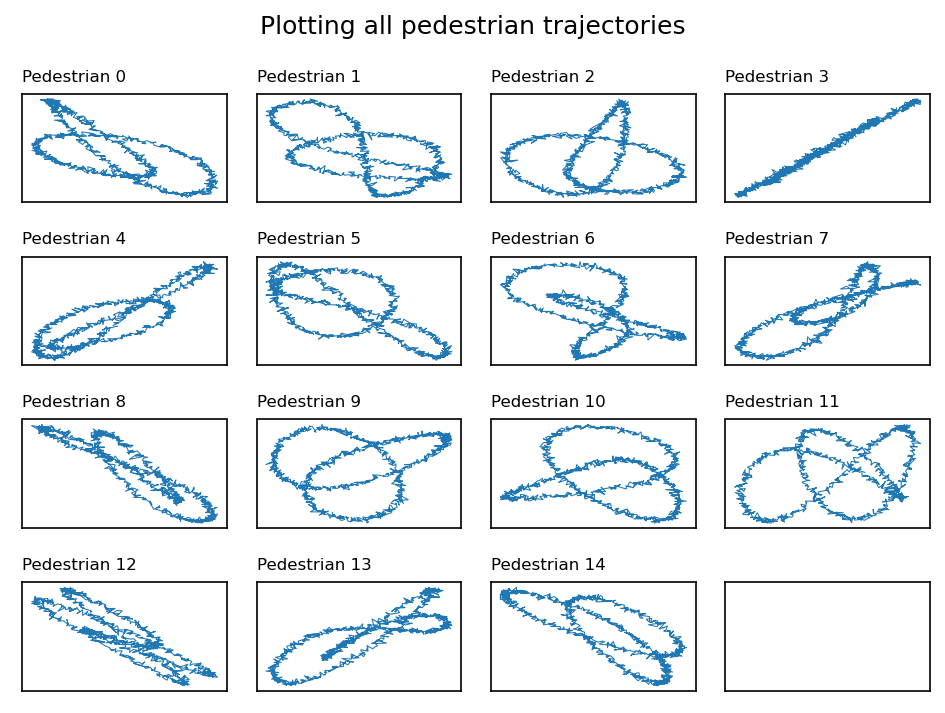

In [4]:
# Plot data
width = np.shape(data)[1]
c = 0

fig, axs = plt.subplots(4, 4)
fig.set_dpi(150)
fig.suptitle('Plotting all pedestrian trajectories')
for i in range(4):
    for j in range(4):
        # axs[i, j].set_title("x_{} - x_{}".format(1, 6*i+j))
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])
        if i*j < 9:
            axs[i, j].set_title("Pedestrian {}".format(int(c/2)), fontsize=8, loc='left')
            axs[i, j].plot(data[:,c], data[:,c+1],linewidth=0.5)
        c += 2
fig.tight_layout()

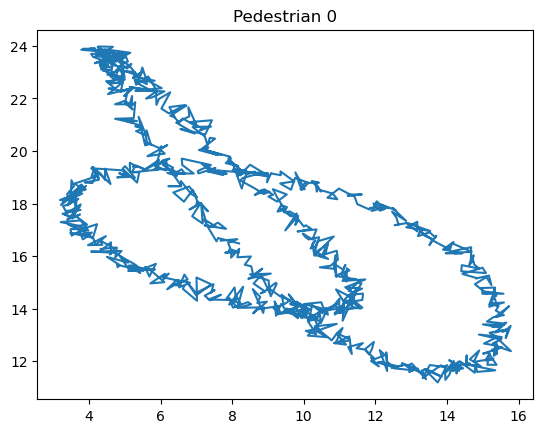

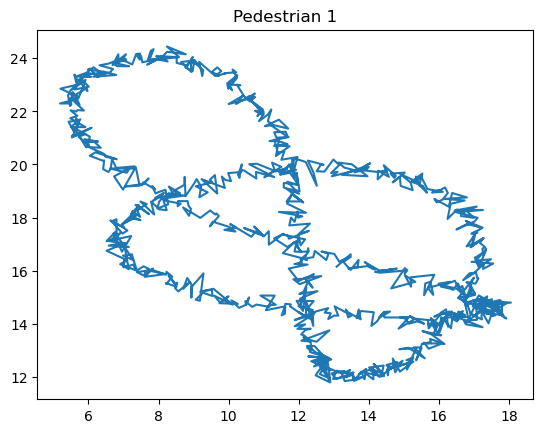

In [5]:
# Visualize first 2 pedestrians
for i in range(2):
    plt.title("Pedestrian {}".format(i))
    plt.plot(data[:,2*i], data[:,2*i+1])
    plt.show()

In [8]:
# Fit data
l = 5
diffMap = model.DiffusionMap(numEigen=l)
diffMap.fit(data, max_dist=100.0)

# Compute accuracy
print(diffMap.acc(data, diffMap.dMap[:,0], diffMap.dMap[:,0]))

25.197437667493446


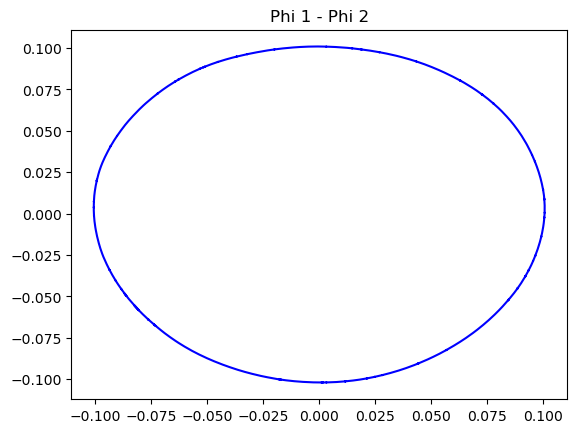

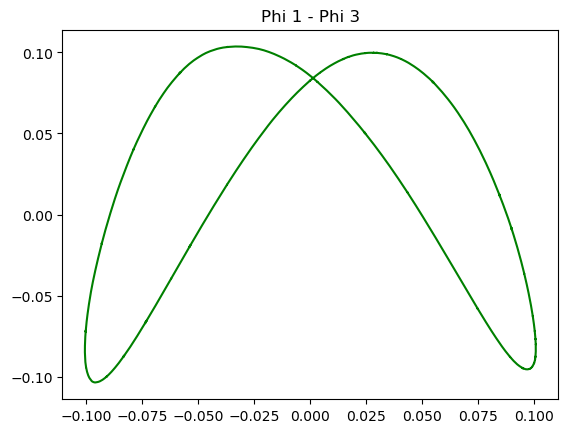

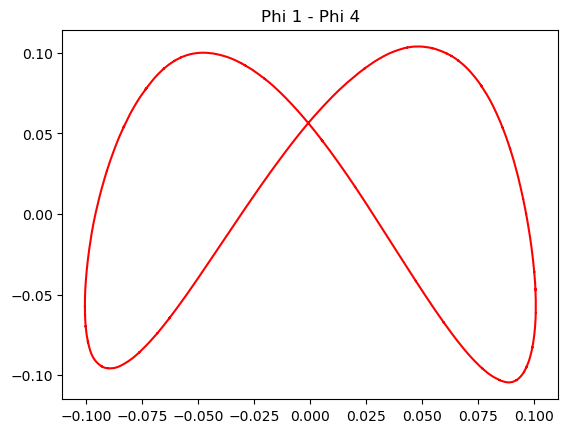

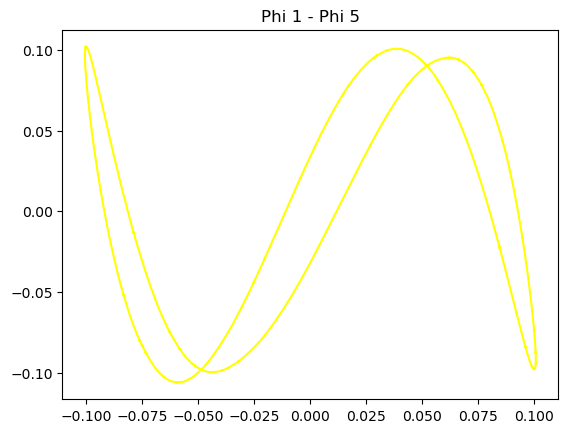

In [7]:
# Separate plots
dm = [diffMap.dMap[:,x] for x in range(l)]
colorMap = ["blue", "green", "red", "yellow"]

for i in range(l-1):
    plt.title("Phi 1 - Phi {}".format(i+2))
    plt.plot(dm[0], dm[i+1], color=colorMap[i])
    plt.show()
    